<h1><center> Colorectal Cancer Quality Indicators using the Personal Health Train </center></h1><h2><center> ~Demonstration~ </center></h2>

<h3> Maastricht University, Netherlands <h3>


### Personal Health Train Setup

<center><img src='architecture.png'></center>

### Steps

- Researcher builds the train and pushes it to Docker registry
    -  SPARQL Query 
    - Station Algorithm 
- Researcher Authentication
- Create Train and Post tasks to Each Center
- Master Algorithm – Aggregated Result

https://gitlab.com/UM-CDS/projects/zin-dcra/railway-researcher 

### Station Algorithm 

https://gitlab.com/UM-CDS/projects/zin-dcra/prototypetrain/-/blob/master/src/stationAlgorithm.py 
    
.......
    outData = {
        'total_count_colon':total_count_colon,
        'total_population_colon':total_population_colon,
        'percentage_of_short_waitlist':percentage_of_short_waitlist,
        'count_rectum': count_rectum,
        'total_population_rectum':total_population_rectum,
        'complication_rate':complication_rate,
        }

    outputStr = json.dumps(outData)
    logging.info('done with calculation') 
    return outputStr


### Researcher Login and Authentication

In [70]:
# User Login to the registry

from app.railway_researcher import RailwayResearcher
import json
import time
import html

start_time= time.time()

keycloakUrl = "https://dcra-keycloak.railway.medicaldataworks.nl"
keycloakClient = "ananya"
keycloakToken = "c3b77319-0ee5-444a-8391-615c1d037ed9"
railwayUrl = "https://dcra.railway.medicaldataworks.nl"

railway = RailwayResearcher(keycloakUrl, keycloakClient, keycloakToken, railwayUrl)

print("Login Successfull")

Login Successfull


### Create and Post Train

In [71]:
## Create train
print("====================Train====================")
train = railway.createTrain("Colo Rectal Quality Indicator", "registry.gitlab.com/ananyacn/zin_dcra-runner", "03838bb4-8103-4a98-a9c3-d4848b13b3f6", 3)

====================Train====================
{"id":95,"name":"Colo Rectal Quality Indicator","dockerImageUrl":"registry.gitlab.com/ananyacn/zin_dcra-runner","ownerId":"d57b0c40-e757-460f-a8f2-08531032e640","calculationStatus":"REQUESTED","currentIteration":0,"clientTaskCount":3}


### SPARQL Query to fetch data

In [72]:
# Query to fetch data from FAIR data stations
inputData = {
    "query": """
        prefix dbo: <http://um-cds/ontologies/databaseontology/>
        prefix db: <http://localhost/rdf/ontology/>
        prefix SCTID: <http://snomed.info/id/>
        PREFIX owl: <http://www.w3.org/2002/07/owl#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        
        SELECT ?id ?lokalisatie ?diagnosedatum ?datum_van_chirurgische_therapie ?datum_van_neoadjuvante_therapie ?gecompliceerd_beloop
        WHERE {
            ?row dbo:has_column [
                rdf:type SCTID:116154003;
                dbo:has_value ?id;
            ];
            dbo:has_column [
                rdf:type SCTID:371480007;
                dbo:has_value ?lokalisatie;
            ];
            dbo:has_column [
                rdf:type SCTID:432213005;
                dbo:has_value ?diagnosedatum;
            ];
            dbo:has_column [
                rdf:type SCTID:257556004;
                dbo:has_value ?datum_van_chirurgische_therapie;
            ];
            dbo:has_column [
                rdf:type SCTID:373847000;
                dbo:has_value ?datum_van_neoadjuvante_therapie;
            ];
            dbo:has_column [
                rdf:type SCTID:263718001;
                dbo:has_value ?gecompliceerd_beloop;
            ].
        }"""
    
}

### Post tasks for the train to each center

In [73]:
## Post Tasks
time_task = time.time()

task1 = railway.createTask(train, "REQUESTED", "", "maastro", 0, 0, False, json.dumps(inputData))
print("====================Task 1====================")
print(task1)


task2 = railway.createTask(train, "REQUESTED", "", "CDS", 0, 0, False, json.dumps(inputData))
print("\n ====================Task 3====================")
print(task2)

====================Task 1====================
{'id': 205, 'creationTimestamp': '2020-09-28T10:04:29.253+0000', 'trainId': 95, 'calculationStatus': 'REQUESTED', 'result': '', 'stationId': 5, 'input': '{"query": "\\n        prefix dbo: <http://um-cds/ontologies/databaseontology/>\\n        prefix db: <http://localhost/rdf/ontology/>\\n        prefix SCTID: <http://snomed.info/id/>\\n        PREFIX owl: <http://www.w3.org/2002/07/owl#>\\n        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>\\n        \\n        SELECT ?id ?lokalisatie ?diagnosedatum ?datum_van_chirurgische_therapie ?datum_van_neoadjuvante_therapie ?gecompliceerd_beloop\\n        WHERE {\\n            ?row dbo:has_column [\\n                rdf:type SCTID:116154003;\\n                dbo:has_value ?id;\\n            ];\\n            dbo:has_column [\\n                rdf:type SCTID:371480007;\\n                dbo:has_value ?lokalisatie;\\n            ];\\n            dbo:has_column [\\n                rdf:typ

### Retreieve Results from the server

In [74]:
# Get Results 

taskResult2 = railway.getTaskResult(task2, waitCompleted=True)
print("====================MasterResult====================")
print(taskResult2)
print('#####################################################')
time_center2 = time.time() - time_task

taskResult1 = railway.getTaskResult(task1, waitCompleted=True)
print("====================MasterResult====================")
print(taskResult1)
print('#####################################################')

time_center1 = time.time() - time_task
time_to_task = time.time() - time_task

====================MasterResult====================
{'id': 206, 'creationTimestamp': '2020-09-28T10:04:29.336+0000', 'trainId': 95, 'calculationStatus': 'COMPLETED', 'result': '{"total_count_colon": 7, "total_population_colon": 10, "percentage_of_short_waitlist": 0.7, "count_rectum": 4, "total_population_rectum": 7, "complication_rate": 0.5714285714285714}', 'stationId': 6, 'input': '{"query": "\\n        prefix dbo: <http://um-cds/ontologies/databaseontology/>\\n        prefix db: <http://localhost/rdf/ontology/>\\n        prefix SCTID: <http://snomed.info/id/>\\n        PREFIX owl: <http://www.w3.org/2002/07/owl#>\\n        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>\\n        \\n        SELECT ?id ?lokalisatie ?diagnosedatum ?datum_van_chirurgische_therapie ?datum_van_neoadjuvante_therapie ?gecompliceerd_beloop\\n        WHERE {\\n            ?row dbo:has_column [\\n                rdf:type SCTID:116154003;\\n                dbo:has_value ?id;\\n            ];\\n     

### MASTER ALGORITHM 

In [75]:
# Master Algorithm
from matplotlib import pyplot

#Serialize Results
result2 = taskResult2['result']
res2 = json.loads(result2)

result1 = taskResult1['result']
res1 = json.loads(result1)


# indicator 2b
percentage1 = res1['percentage_of_short_waitlist']
percentage2 = res2['percentage_of_short_waitlist']
mean = (percentage1+percentage2)/2

y1 = [percentage1,percentage2]
x1 = [res1['total_population_colon'],res2['total_population_colon']]


# indicator 8
baseline_complication_rate = (res1['complication_rate']+res2['complication_rate'])/2

node1_complication_rate = res1['complication_rate']/baseline_complication_rate
node2_complication_rate = res2['complication_rate']/baseline_complication_rate

node1_expected_complication = res1['total_population_rectum']*baseline_complication_rate
node2_expected_complication =res2['total_population_rectum']*baseline_complication_rate

y = [node1_complication_rate,node2_complication_rate]
x = [node1_expected_complication,node2_expected_complication]

### Indicator 2b 

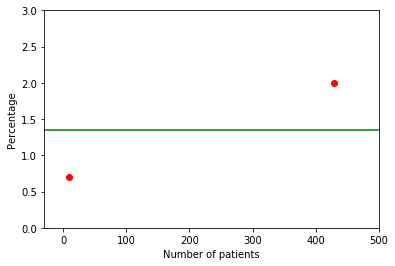

In [76]:
fig1 = pyplot.figure()
ax = fig1.add_subplot(111)
ax.set_ylim(0,3)
ax.set_xlim(-30,500)
pyplot.xlabel('Number of patients')
pyplot.ylabel('Percentage')
pyplot.axhline(y=mean, color='g', linestyle='-')
pyplot.plot(x1, y1, 'o', color='red')
pyplot.savefig('Indicator2b.png')

### Indicator 8

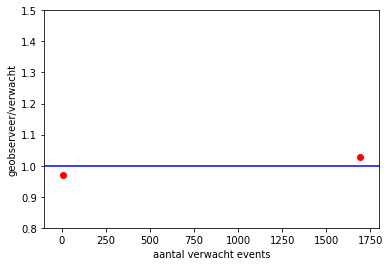

In [82]:

fig2 = pyplot.figure()
ax2 = fig2.add_subplot(111)
ax2.set_ylim(0.8,1.5)
ax2.set_xlim(-100,1800)
pyplot.xlabel('aantal verwacht events')
pyplot.ylabel('geobserveer/verwacht')
pyplot.axhline(y=1, color='b', linestyle='-')
pyplot.plot(x, y, 'o', color='red')

end_time = time.time()

### Elapsed Time 

In [80]:

total_elapsed_time = end_time - start_time

print("Total time                --------  %d seconds" % int(round(total_elapsed_time)))
print("Time for distributed task --------  %d seconds" % int(round(time_to_task)))
print("                 Center 1 --------  %d seconds" % int(round(time_center1)))
print("                 Center 2 --------  %d seconds" % int(round(time_center2)))

Total time                --------  274 seconds
Time for distributed task --------  184 seconds
                 Center 1 --------  184 seconds
                 Center 2 --------  21 seconds


# <center> Thank You </center>